In [ ]:
```
---
layout: post
title:  "Warmest Climate in the West"
description: "Data Science Blog post on finding the city with the warmest climate in the west"
image: /assets/img/blog-image.jpg
---
```


Finding a place to live in the west can be difficult, especially since weather can vary so much. I wanted to find what major city had the warmest climate.

In order to get this data I used the Xweather API. I was required to sign up for a free developer account, and stayed under the request limit. In order to keep my data gathering ethical I also paused between requests as they request.

In order to get this data you'll need to go to Xweather and sign up for their free developer account so you can access their API.

To get the dataset you'll need to decide on the cities and weather keywords you want to use.

In [2]:
cities = [
    "salt lake city, ut", "denver, co", "boise, id", "spokane, wa", "reno, nv",
    "phoenix, az", "las vegas, nv", "los angeles, ca", "san francisco, ca",
    "seattle, wa", "portland, or", "sacramento, ca", "fresno, ca", "tucson, az",
    "albuquerque, nm", "cheyenne, wy", "helena, mt", "billings, mt", "missoula, mt",
    "bend, or", "medford, or", "bakersfield, ca", "stockton, ca", "riverside, ca",
    "pueblo, co", "elko, nv", "flagstaff, az", "great falls, mt", "idaho falls, id"
]

weather_keywords = ["rain", "snow", "drizzle", "thunder", "storm", "cloudy", "windy"]

This is an example of what I used in order to get my dataset.

You can then query the API with this data, add the results to a dataframe, and start analyzing the data.

In [5]:
import pandas as pd
df = pd.read_csv('/content/weather_data.csv')
print(df.head())

                 city  temperature  feels_like  humidity  wind_speed  \
0  salt lake city, ut        42.66       42.66        56        4.54   
1          denver, co        30.35       30.35        84        2.77   
2           boise, id        47.17       47.17        62        2.00   
3         spokane, wa        43.03       43.03        87        5.03   
4            reno, nv        44.06       44.06        54        5.16   

         weather  sky  
0  mostly cloudy   77  
1  mostly cloudy   81  
2         cloudy   96  
3   rain showers  100  
4  partly cloudy   43  


If we want to find the city with the warmest climate we'll need to start by finding the city with the highest temperature, feel-like, and humidity.
We can do this by finding either the max variable in the dataset.

In [6]:
max_temp = df['temperature'].max()
city_max_temp = df[df['temperature'] == max_temp]['city'].iloc[0]

max_feels_like = df['feels_like'].max()
city_max_feels_like = df[df['feels_like'] == max_feels_like]['city'].iloc[0]

max_humidity = df['humidity'].max()
city_max_humidity = df[df['humidity'] == max_humidity]['city'].iloc[0]

min_wind_speed = df['wind_speed'].min()
city_min_wind_speed = df[df['wind_speed'] == min_wind_speed]['city'].iloc[0]

print("Max Temperature:", max_temp, "from", city_max_temp)
print("Max Feels-Like:", max_feels_like, "from", city_max_feels_like)
print("Max Humidity:", max_humidity, "from", city_max_humidity)

Max Temperature: 57.13 from san francisco, ca
Max Feels-Like: 57.13 from san francisco, ca
Max Humidity: 96 from seattle, wa


Based on this we can see that San Francisco has the highest temperature and feels-like, while Seattle has the highest humidity. In order to figure out which city has the overall warmest climate, we'll need to create a composite score that combines the temperature variables and humidity. I weighted temperature the highest at 0.5 since it's the greatest factor, and I weighted feels-by and humidity at 0.25 since they're still a factor, but are more for comfort.

In [10]:
df['composite_score'] = (
    df['temperature'] * 0.5 +
    df['feels_like'] * 0.25 +
    df['humidity'] * 0.25
)

warmest_city = df.loc[df['composite_score'].idxmax(), 'city']
warmest_score = df['composite_score'].max()

print(f"The city with the warmest climate based on temperature, feels-like, and humidity is {warmest_city} with a composite score of {warmest_score:.2f}.")


The city with the warmest climate based on temperature, feels-like, and humidity is san francisco, ca with a composite score of 62.90.


We can then graph the composite score for all the cities and get a better picture of how they compare.

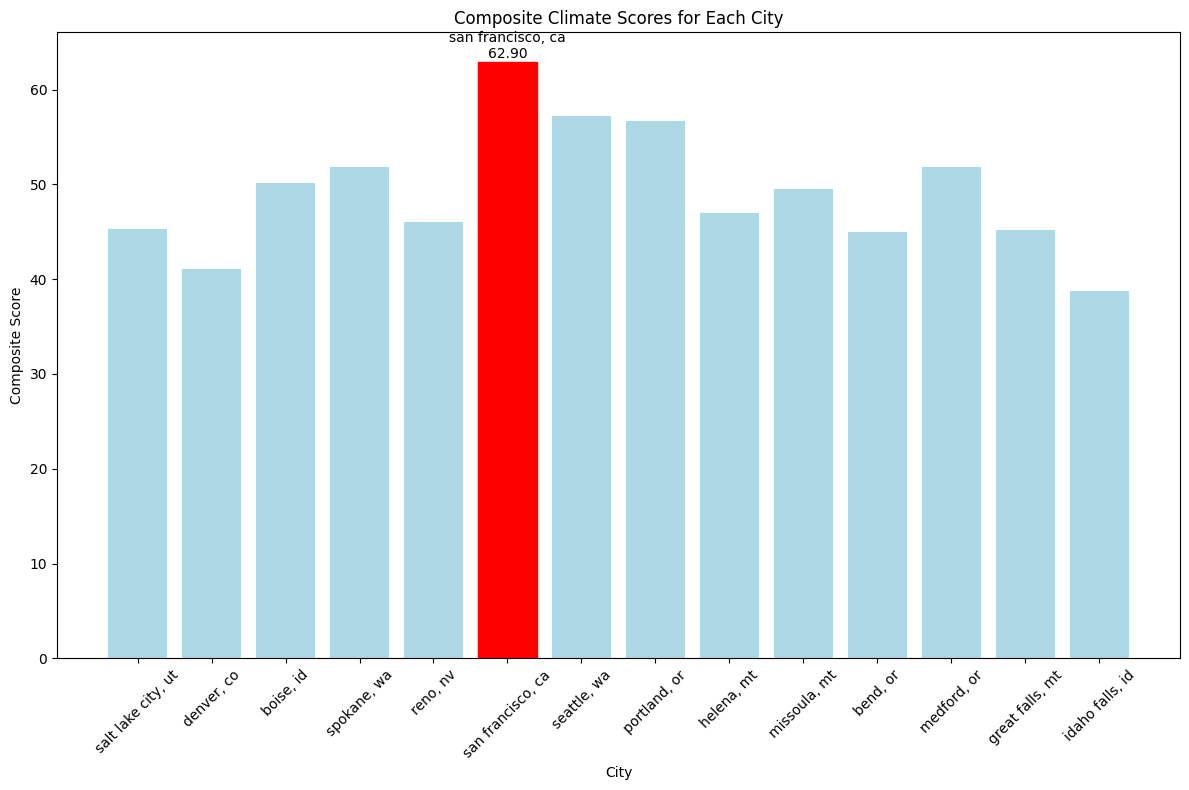

In [29]:
plt.figure(figsize=(12, 8))
bars = plt.bar(df['city'], df['composite_score'], color='lightblue')

max_bar = bars[df['composite_score'].idxmax()]
max_bar.set_color('red')

plt.text(df['city'][df['composite_score'].idxmax()],
         warmest_score + 0.1,
         f"{warmest_city}\n{warmest_score:.2f}",
         ha='center', va='bottom', color='black')

plt.xlabel("City")
plt.ylabel("Composite Score")
plt.title("Composite Climate Scores for Each City")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

However there are also other factors that can help us figure out which city has the warmest climate like wind speed. The city with the lowest wind speed is going to have a slightly warmer climate than windier cities.

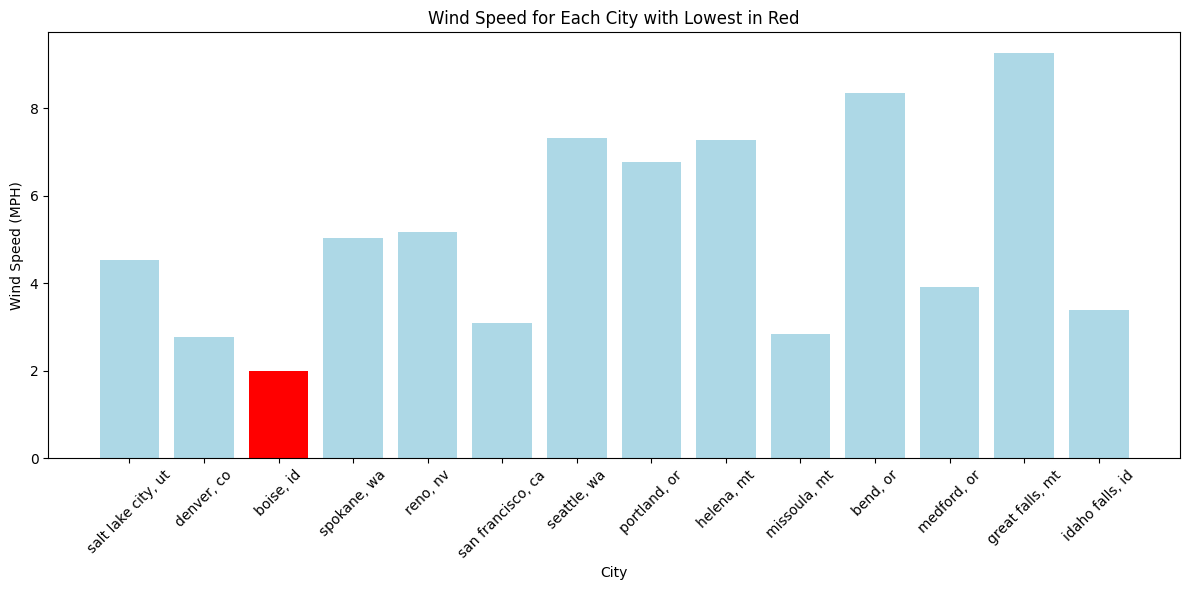

In [31]:
min_wind_speed = df['wind_speed'].min()

colors = ['red' if wind_speed == min_wind_speed else 'lightblue' for wind_speed in df['wind_speed']]

plt.figure(figsize=(12, 6))
bars = plt.bar(df['city'], df['wind_speed'], color=colors)

plt.xlabel("City")
plt.ylabel("Wind Speed (MPH)")
plt.title("Wind Speed for Each City with Lowest in Red")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Based on this we can see that although boise has the lowest wind speed, our earlier contender for warmest climate, san francisco, also has a relatively low wind speed.

We can also look at sky coverage to get an idea of which cities would be the sunniest.

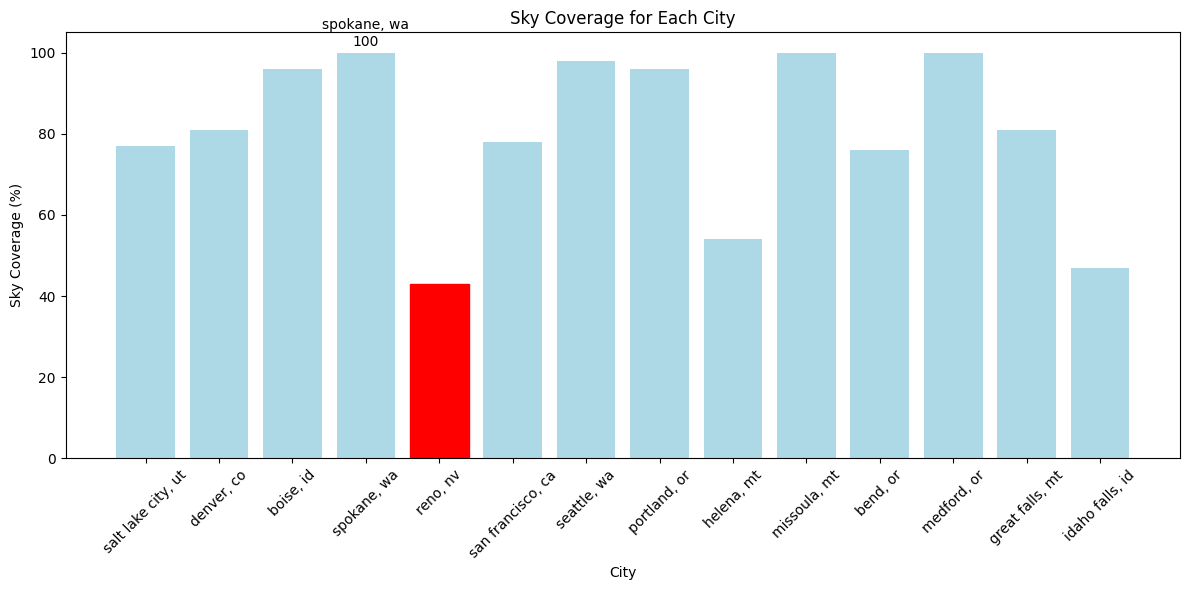

In [37]:
max_sky_value = df['sky'].max()
max_sky_city = df[df['sky'] == max_sky_value]['city'].iloc[0]

plt.figure(figsize=(12, 6))
bars = plt.bar(df['city'], df['sky'], color='lightblue')

min_bar = bars[df['sky'].idxmin()]
min_bar.set_color('red')

plt.text(df['city'][df['sky'].idxmax()],
         max_sky_value + 1,
         f"{max_sky_city}\n{max_sky_value}",
         ha='center', va='bottom', color='black')

plt.xlabel("City")
plt.ylabel("Sky Coverage (%)")
plt.title("Sky Coverage for Each City")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Based on the graph we can see that reno has the lowest cloud coverage, and that san francisco also has lower cloud coverage.

In conclusion, based on the data we gathered and the analysis we did, it seems like San Francisco has the warmest climate of the cities we looked at. A warm climate might be a positive or negative depending on your outlook, but for those moving to the west looking for warmer weather, San Francisco could be the place.

For those interested in the dataset I used, it had 14 cities, 2 categorical variables, and 5 numerical variables. This dataset could have been expanded further, but it did have enough data to do some interesting analysis. Unfortunately the weather variable was not very useful, so it was not used in this analysis. The data gathered was also from 11/13/2024 at 11:00 P.M., which could affect the analysis, however this was the data available from the API.

If you're interested in all of the code used to create this post, I'll include a link to the github repository where it's located.
https://github.com/willknisley/blog2